# 🛍️ Mall Customer Segmentation using KMeans Clustering
**Name:** Dhaanya Eday   

This project segments mall customers based on income and spending score.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Style settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/tmp/ipython-input-630161354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


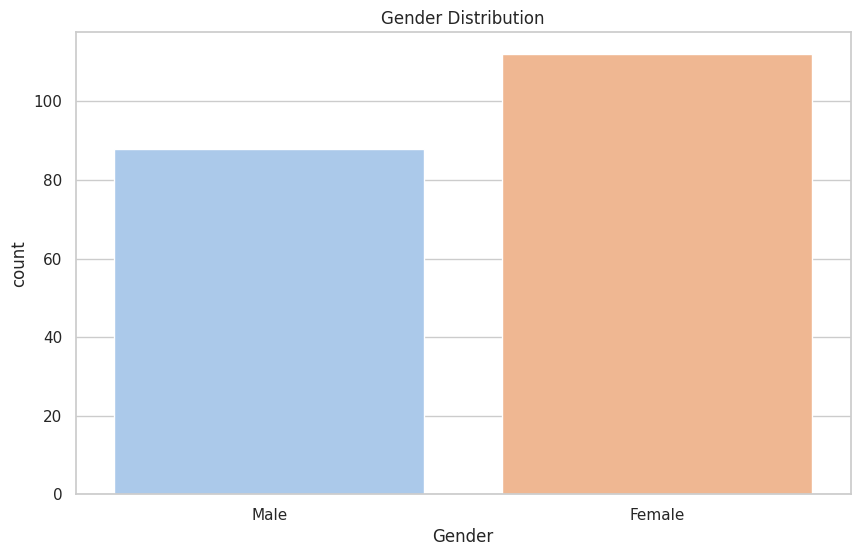

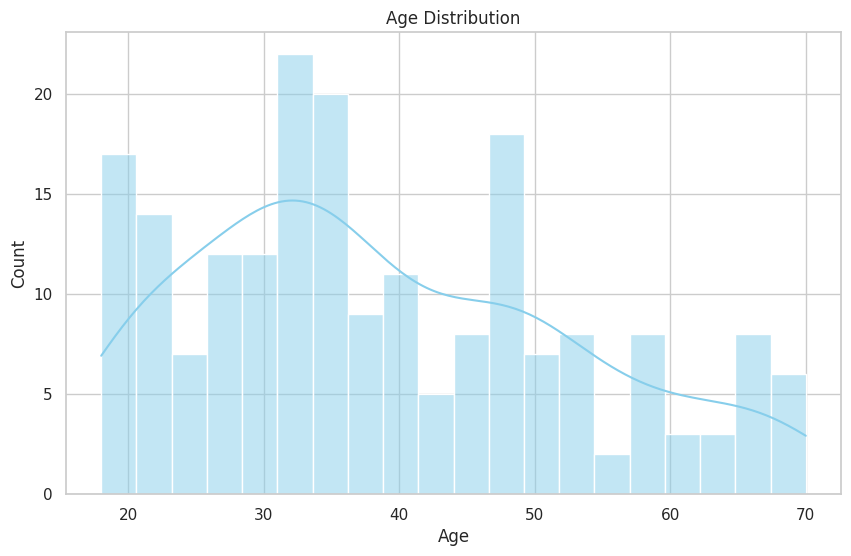

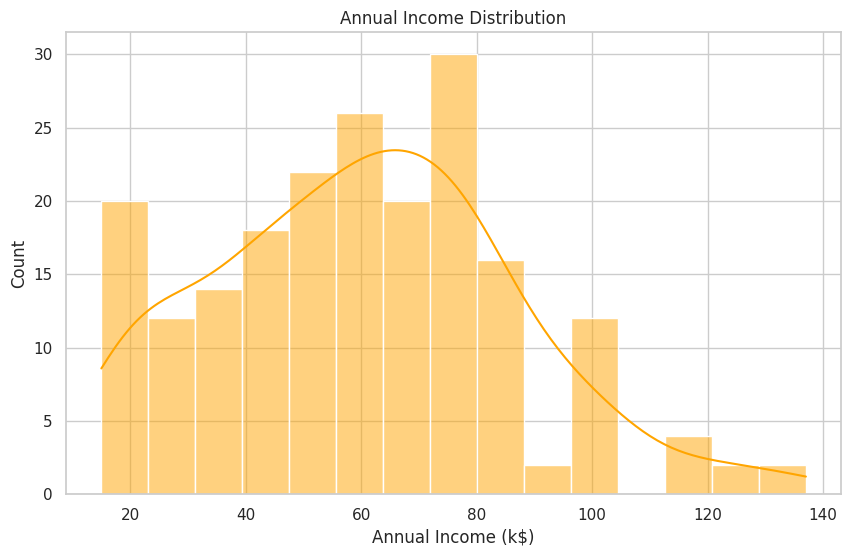

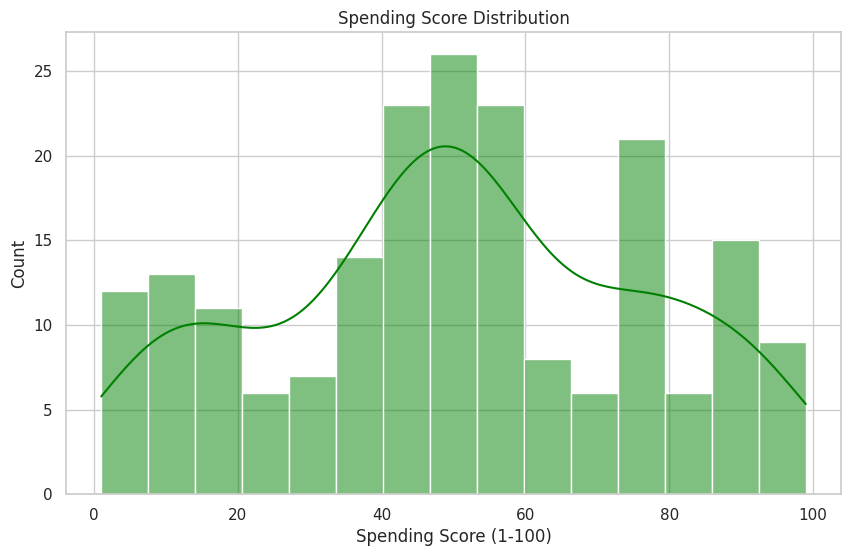

In [ ]:
# Gender distribution
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Income distribution
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='orange')
plt.title('Annual Income Distribution')
plt.show()

# Spending score distribution
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.show()

In [ ]:
# Remove ID and Gender
X = df.drop(['CustomerID', 'Gender'], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

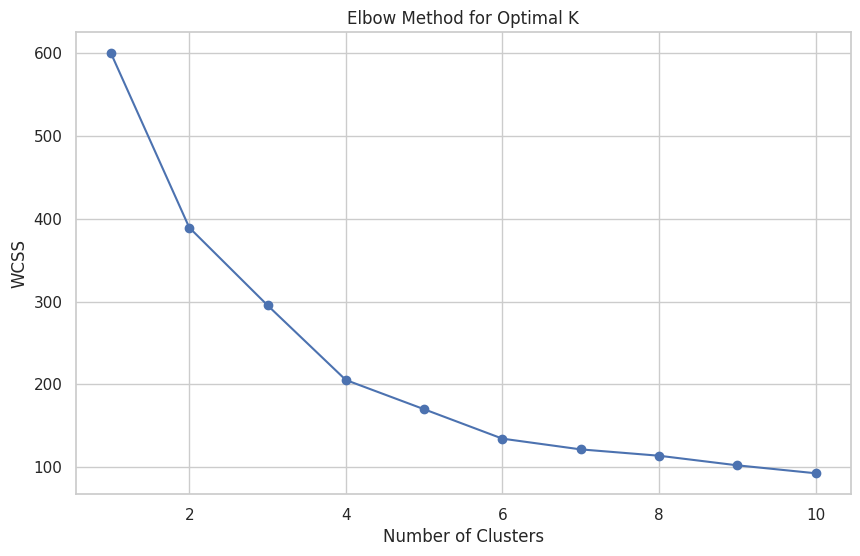

In [ ]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

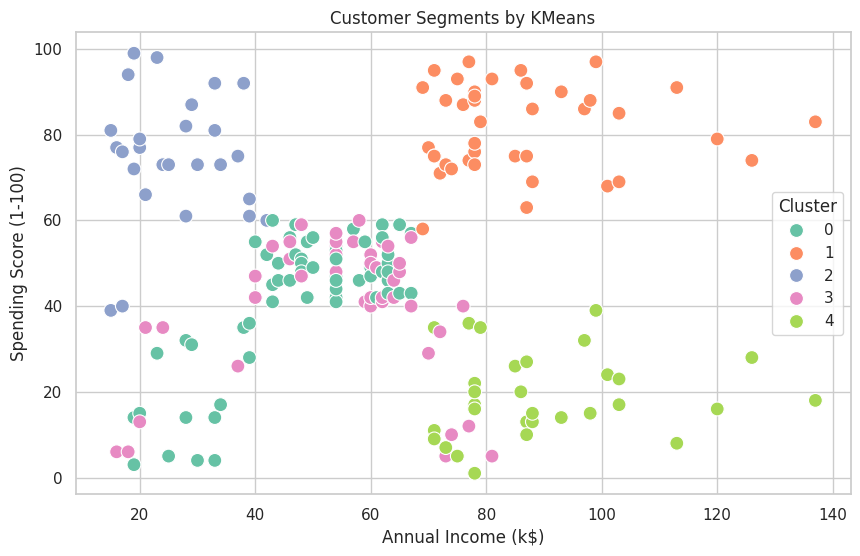

In [ ]:
# Apply KMeans with k=5
k = 5
model = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = model.fit_predict(X_scaled)

# Visualize clusters
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments by KMeans")
plt.show()

In [ ]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


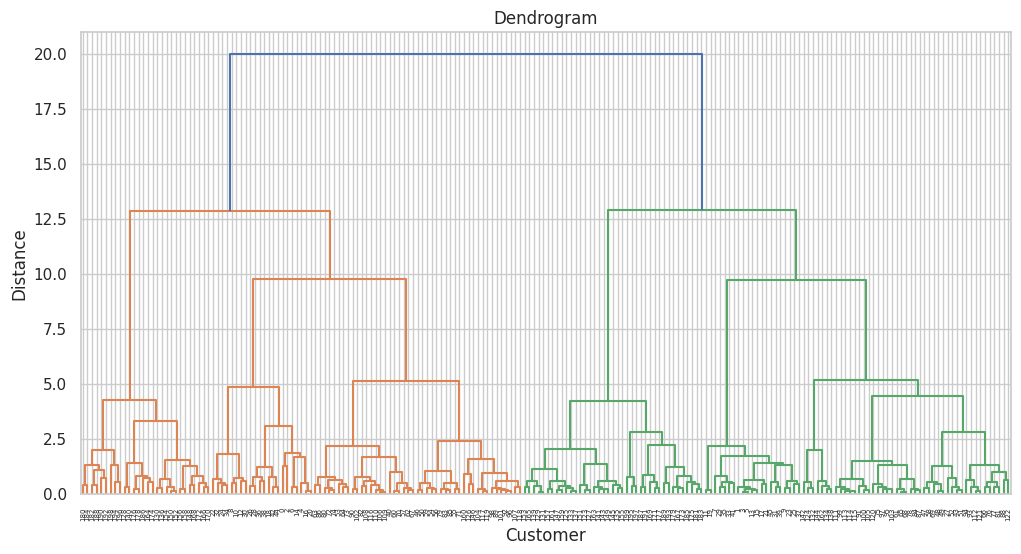

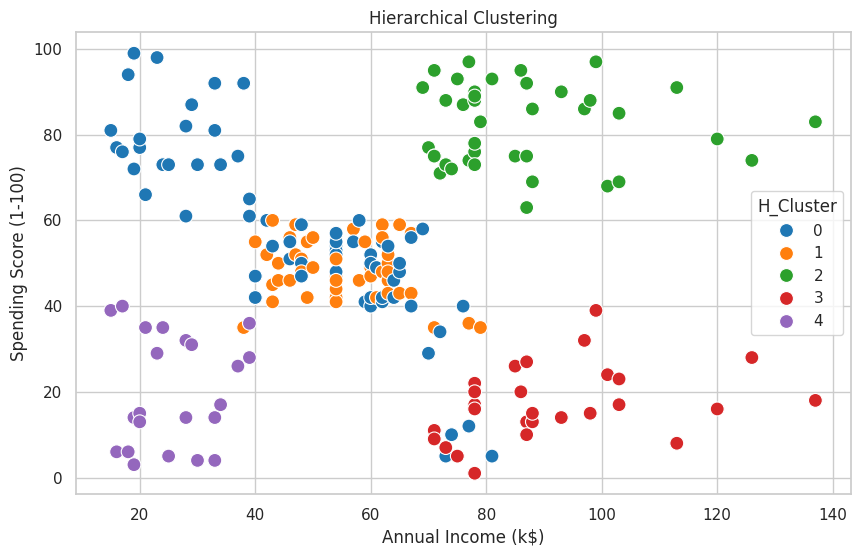

In [ ]:
# Dendrogram
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters=5)
df['H_Cluster'] = hc_model.fit_predict(X_scaled)

# Visualize clusters
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='H_Cluster', palette='tab10', s=100)
plt.title("Hierarchical Clustering")
plt.show()

## ✅ Conclusion

Using KMeans clustering, we segmented mall customers into 5 distinct groups based on income and spending patterns.

- Cluster 0: Low income, low spending  
- Cluster 1: High income, high spending — 🎯 Ideal target group  
- Cluster 2: Average income, moderate spending  
- Cluster 3: Low income, high spending — impulsive buyers  
- Cluster 4: High income, low spending — potential savers

These segments can help mall marketers customize offers, increase retention, and improve profit margins through data-driven targeting.